#### pytorch搭建神经网络模型，尝试调整模型结构（变更神经元数量，增加隐藏层）来提升模型预测的准确率


In [28]:
#导入包
import torch
from torchvision.datasets import KMNIST
from torchvision.transforms import ToTensor 
from torch.utils.data import DataLoader
import torch.nn as nn

# 定义超参数
LR = 1e-3
epochs = 10 #训练轮次，100轮左右损失率降到了1以下，1000轮降到0.3左右，Accuracy: 76.03%
BATCH_SIZE = 128  #每批64张


#数据集加载
train_data = KMNIST(root='./kmnist_data', train=True, download=True, transform=ToTensor())
test_data = KMNIST(root='./kmnist_data', train=False, download=True, transform=ToTensor())

#数据分批次处理
train_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True) # shuffle：随机打乱数据
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True) # shuffle：随机打乱数据



# # 模型创建 
# # 神经元增加 （训练100轮，神经元256，Accuracy: 60.11%, 神经元1000，Accuracy: 61.39%）=》增加神经元对损失率影响不大
# # 增加1个隐藏层（隐藏层2层，训练100轮，神经元256，激活函数选ReLU,Accuracy: 73.64%）sigmoid函数增加隐藏层，损失基本不变
# # 隐藏层仅1层，使用ReLU函数，神经元256个，Accuracy: 72.8%
# model = nn.Sequential(
#     nn.Linear(784, 256),  #输入层
#     nn.ReLU(),     #隐藏层
#     nn.Linear(256, 128),  # 新增的隐藏层
#     nn.ReLU(),
#     nn.Linear(128, 10)  #输出层
# )


In [22]:
def train_iter(epochs, model, train_dl):
    train_hist = []
    #损失函数和优化器
    loss_fn = nn.CrossEntropyLoss() #交叉熵损失函数

    #优化器（模型参数更新）
    optimizer = torch.optim.SGD(model.parameters(), lr=LR) #SGD优化器

    ###加上训练轮次
    # 训练加速，数据加载器，分批次
    for epoch in range(epochs):
        for data, target in train_dl:
            #前向运算
            output = model(data.reshape(-1, 784))
            #计算损失
            loss = loss_fn(output, target) #计算梯度
            #反向传播
            optimizer.zero_grad() #所有参数梯度清零
            loss.backward()  #计算梯度（参数.grad）
            optimizer.step() #更新参数
        print(f'Epoch:{epoch}, Loss:{loss.item()}')
        train_hist.append(loss.item())
    return train_hist

In [14]:
# 绘制模型
def draw_train_hist(hist):
    import matplotlib.pyplot as plt
    plt.plot(hist)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("Training Loss")
    plt.show()

In [15]:
# 测试
def test_acc(test_dl, model):
    # test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

    correct = 0
    total = 0

    with torch.no_grad(): #不计算梯度
        for data, target in test_dl:
            output = model(data.reshape(-1, 784))
            _, predicted = torch.max(output, 1) #返回第一个维度的最大值张量
            total += target.size(0) #返回张量的样本量
            correct += (predicted == target).sum().item()
    # print(f'Accuracy: {correct/total*100}%')
    return correct/total*100

In [16]:

# 模型定义
model1 = nn.Sequential(
    nn.Linear(784, 512),  #输入层
    nn.Sigmoid(),     #隐藏层
    nn.Linear(512, 256),  # 新增的隐藏层
    nn.Sigmoid(),
    nn.Linear(256, 10)  #输出层
)

In [17]:
# 模型定义
model2 = nn.Sequential(
    nn.Linear(784, 512),  #输入层
    nn.ReLU(),     #隐藏层
    nn.Linear(512, 256),  # 新增的隐藏层
    nn.ReLU(),
    nn.Linear(256, 10)  #输出层
)

In [19]:
# 模型定义
model3 = nn.Sequential(
    nn.Linear(784, 256),  #输入层
    nn.ReLU(),     #隐藏层
    nn.Linear(256, 10)  #输出层
)

In [25]:
model1_hist = train_iter(epochs, model1, train_dl)
model2_hist = train_iter(epochs, model2, train_dl)
model3_hist = train_iter(epochs, model3, train_dl)

Epoch:0, Loss:2.294949531555176
Epoch:1, Loss:2.293724298477173
Epoch:2, Loss:2.2931430339813232
Epoch:3, Loss:2.29250431060791
Epoch:4, Loss:2.2903900146484375
Epoch:5, Loss:2.2887332439422607
Epoch:6, Loss:2.2909069061279297
Epoch:7, Loss:2.2936601638793945
Epoch:8, Loss:2.290214776992798
Epoch:9, Loss:2.2879908084869385
Epoch:0, Loss:1.0183149576187134
Epoch:1, Loss:1.001250982284546
Epoch:2, Loss:0.9421587586402893
Epoch:3, Loss:0.9884840846061707
Epoch:4, Loss:0.9313231110572815
Epoch:5, Loss:0.8200861811637878
Epoch:6, Loss:0.8079478740692139
Epoch:7, Loss:0.750167191028595
Epoch:8, Loss:0.7561137676239014
Epoch:9, Loss:0.6336906552314758
Epoch:0, Loss:0.7041003704071045
Epoch:1, Loss:0.9323027729988098
Epoch:2, Loss:0.7239603400230408
Epoch:3, Loss:0.7054171562194824
Epoch:4, Loss:0.7179031372070312
Epoch:5, Loss:0.8115909099578857
Epoch:6, Loss:0.7972789406776428
Epoch:7, Loss:0.7668432593345642
Epoch:8, Loss:0.9740839004516602
Epoch:9, Loss:0.7274104952812195


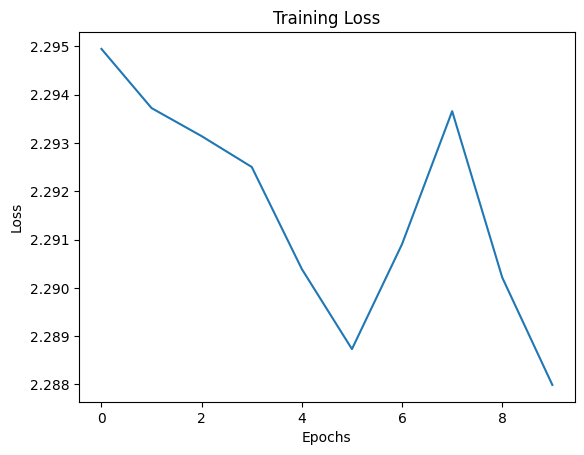

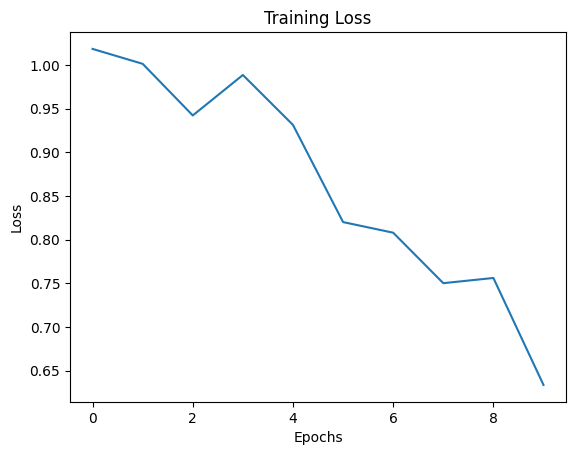

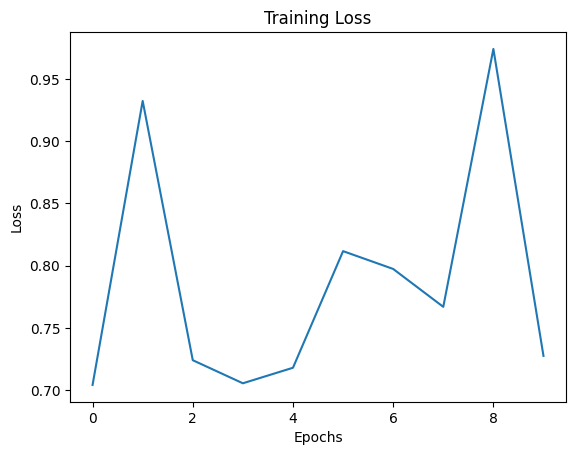

Model1 Acc: 39.21
Model2 Acc: 62.470000000000006
Model3 Acc: 64.18


In [29]:
draw_train_hist(model1_hist)
draw_train_hist(model2_hist)
draw_train_hist(model3_hist)


print("Model1 Acc:",test_acc(test_dl,model1))
print("Model2 Acc:", test_acc(test_dl,model2))
print("Model3 Acc:", test_acc(test_dl,model3))